In [88]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [89]:
df = pd.read_excel(r'C:\Users\GabrielMedina\Desktop\Gitizin\tabela_aluguel_studios.xlsx')
df.head()

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
0,1,2470084910,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,1100,40,1,0,0,1,27.50
1,10,2470853274,Zap Imóveis,Ponte Pequena,Centro,São Paulo,Aluguel,9,700,3300,30,1,1,1,1,110.00
2,16,2471961576,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,715,0,4000,139,1,0,1,1,28.78
3,19,2472362687,Zap Imóveis,Campos Elíseos,Centro,São Paulo,Aluguel,35000,0,160000,11200,1,0,99,0,14.29
4,23,2472749891,Zap Imóveis,Indianópolis,Zona Sul,São Paulo,Aluguel,0,850,3500,41,1,1,1,1,85.37


In [90]:
df.shape

(47587, 16)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47587 entries, 0 to 47586
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        47587 non-null  int64  
 1   Id_Oferta         47587 non-null  int64  
 2   Portal            47587 non-null  object 
 3   Bairro            47587 non-null  object 
 4   Zona              47587 non-null  object 
 5   Cidade            47587 non-null  object 
 6   Status            47587 non-null  object 
 7   Valor_Iptu        47587 non-null  int64  
 8   Valor_Condominio  47587 non-null  int64  
 9   Valor_Aluguel     47587 non-null  int64  
 10  Area_Privativa    47587 non-null  int64  
 11  Dormitorios       47587 non-null  int64  
 12  Suites            47587 non-null  int64  
 13  Vagas             47587 non-null  int64  
 14  Banheiros         47587 non-null  int64  
 15  Aluguel_m2        47584 non-null  float64
dtypes: float64(1), int64(10), object(5)
memo

In [92]:
df.describe()

,Unnamed: 0,Id_Oferta,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
count,47587.000000,4.758700e+04,4.758700e+04,4.758700e+04,47587.000000,47587.000000,47587.0,47587.000000,47587.000000,47587.000000,47584.000000
mean,106372.379810,2.464614e+09,8.408286e+02,1.149685e+03,3554.135940,58.858134,1.0,0.332339,0.938029,1.195999,65.364296
std,64262.443364,1.909567e+08,8.123393e+04,3.182012e+04,10411.708176,296.713165,0.0,0.477789,1.869217,0.785231,227.014436
min,1.000000,4.216065e+07,0.000000e+00,0.000000e+00,100.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.060000
25%,53686.500000,2.478920e+09,1.000000e+00,3.400000e+02,1611.000000,35.000000,1.0,0.000000,0.000000,1.000000,40.000000
50%,101742.000000,2.486492e+09,9.800000e+01,5.460000e+02,2350.000000,42.000000,1.0,0.000000,1.000000,1.000000,55.560000
75%,150312.000000,2.493186e+09,1.800000e+02,8.000000e+02,3300.000000,50.000000,1.0,1.000000,1.000000,1.000000,75.000000
max,227358.000000,2.500724e+09,1.750021e+07,5.200074e+06,680000.000000,60000.000000,1.0,10.000000,130.000000,40.000000,18242.650000


In [93]:
df.isna().any().sum()

1

In [94]:
df.dropna(inplace=True)
df.isna().any().sum()

0

In [95]:
df = df.replace({'Jardim Vera Cruz': 'Perdizes', 'Sumaré': 'Perdizes', 'Vila Anglo Brasileira': 'Perdizes', 
                'Vila Pompéia': 'Perdizes', 'Pompeia': 'Perdizes'})

In [96]:
dfpdz = df[df['Bairro'] == 'Perdizes']
dfpdz

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
97,566,2476789473,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,250,790,2500,45,1,0,1,1,55.56
105,602,2480648130,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,0,460,2690,32,1,0,1,1,84.06
137,729,2472602332,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,0,544,2100,43,1,0,1,1,48.84
152,810,2472365074,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,115,544,2100,45,1,0,1,1,46.67
154,821,2474428627,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,114,543,2100,45,1,0,1,1,46.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47394,226365,2500300029,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,170,560,2000,38,1,1,1,1,52.63
47402,226456,2500311624,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,197,924,2500,55,1,0,1,1,45.45
47453,226691,2500352191,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,80,994,2373,44,1,1,1,1,53.93
47575,227339,2475505980,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,0,0,1550,15,1,1,0,1,103.33


In [97]:
dfpdz['Area_Privativa'].describe()

count    1109.000000
mean       53.929666
std        74.527782
min        10.000000
25%        35.000000
50%        41.000000
75%        50.000000
max      1421.000000
Name: Area_Privativa, dtype: float64

In [98]:
dfpdz['Aluguel_m2'].describe()

count    1109.000000
mean       56.149621
std        22.895131
min        14.120000
25%        42.110000
50%        52.630000
75%        65.710000
max       402.380000
Name: Aluguel_m2, dtype: float64

<Figure size 2160x720 with 0 Axes>

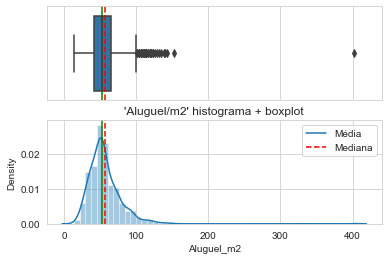

In [117]:
# Verificando a distribuição dos dados na tabela antes de tratada

aluguelm2 = dfpdz.Aluguel_m2
plt.figure(figsize=(30,10))
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (2.0, 2.2)})
mean=np.array(aluguelm2).mean()
median=np.median(aluguelm2)
sns.boxplot(aluguelm2, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
sns.distplot(aluguelm2, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
plt.legend({'Média':mean,'Mediana':median})
plt.title("'Aluguel/m2' histograma + boxplot")
ax_box.set(xlabel='')
plt.show()

In [99]:
# Analisando os limites inefriores e superiores das variáveis de aluguel e área

In [100]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amp = q3 - q1
    lim_inf = q1 - 1.5 * amp
    lim_sup = q3 + 1.5 * amp
    return lim_inf, lim_sup

In [101]:
limites(dfpdz['Area_Privativa'])

(12.5, 72.5)

In [102]:
limites(dfpdz['Aluguel_m2'])

(6.710000000000008, 101.10999999999999)

In [103]:
limites(dfpdz['Valor_Aluguel'])

(975.0, 3575.0)

In [104]:
# Coletando a mediana e o Q3 da tabela df para cercear o estudo nos imóveis entre os Q2 e Q3

med = np.percentile(dfpdz.Aluguel_m2, 50)
q3 = np.percentile(dfpdz.Aluguel_m2, 75)
print(med)
print(q3)

52.63
65.71


In [105]:
pdz_ = dfpdz[(dfpdz.Aluguel_m2 >= med) & (dfpdz.Aluguel_m2 <= q3)]
df_pdz = pd.DataFrame(data=pdz_)
display(df_pdz)

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
97,566,2476789473,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,250,790,2500,45,1,0,1,1,55.56
381,2118,2477761134,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,250,790,2500,45,1,1,1,2,55.56
623,3406,2477758547,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,100,800,2400,40,1,0,1,1,60.00
630,3451,2475013657,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,100,580,2000,38,1,0,1,1,52.63
687,3749,2477471191,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,126,490,2300,41,1,0,1,1,56.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47147,225261,2500061497,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,40,380,2300,40,1,0,0,1,57.50
47177,225453,2500103596,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,136,496,2200,41,1,0,1,1,53.66
47182,225473,2500113316,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,136,495,2190,41,1,1,1,1,53.41
47394,226365,2500300029,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,170,560,2000,38,1,1,1,1,52.63


In [106]:
df_pdz['Area_Privativa'].describe()

count    278.000000
mean      46.007194
std       36.031273
min       25.000000
25%       38.000000
50%       40.000000
75%       44.750000
max      400.000000
Name: Area_Privativa, dtype: float64

In [107]:
# CALCULANDO O LIMITE SUPERIOR DA ÁREA E INTERQUARTIL DO DATASET

areap = limites(df_pdz['Area_Privativa'])
areap

(27.875, 54.875)

In [108]:
df_pdz = df_pdz[df_pdz.Area_Privativa <= areap[1]]
df_pdz

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
97,566,2476789473,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,250,790,2500,45,1,0,1,1,55.56
381,2118,2477761134,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,250,790,2500,45,1,1,1,2,55.56
623,3406,2477758547,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,100,800,2400,40,1,0,1,1,60.00
630,3451,2475013657,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,100,580,2000,38,1,0,1,1,52.63
687,3749,2477471191,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,126,490,2300,41,1,0,1,1,56.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47147,225261,2500061497,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,40,380,2300,40,1,0,0,1,57.50
47177,225453,2500103596,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,136,496,2200,41,1,0,1,1,53.66
47182,225473,2500113316,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,136,495,2190,41,1,1,1,1,53.41
47394,226365,2500300029,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,170,560,2000,38,1,1,1,1,52.63


<Figure size 2160x720 with 0 Axes>

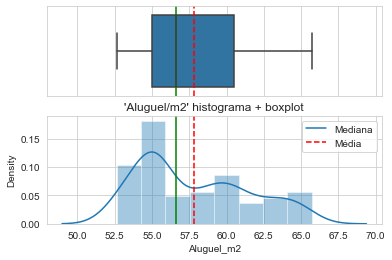

In [118]:
# Verificando a distribuição dos dados na tabela processada


aluguelm2 = df_pdz.Aluguel_m2
plt.figure(figsize=(30,10))
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1.0, 1.2)})
mean=np.array(aluguelm2).mean()
median=np.median(aluguelm2)
sns.boxplot(aluguelm2, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
sns.distplot(aluguelm2, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
plt.legend({'Mediana':median,'Média':mean})
plt.title("'Aluguel/m2' histograma + boxplot")
ax_box.set(xlabel='')
plt.show()

Distribuição assimétrica das variáveis com a mediana menor que a média. Inclinação positiva. Maioria dos valores inferiores à média

<Figure size 1440x720 with 0 Axes>

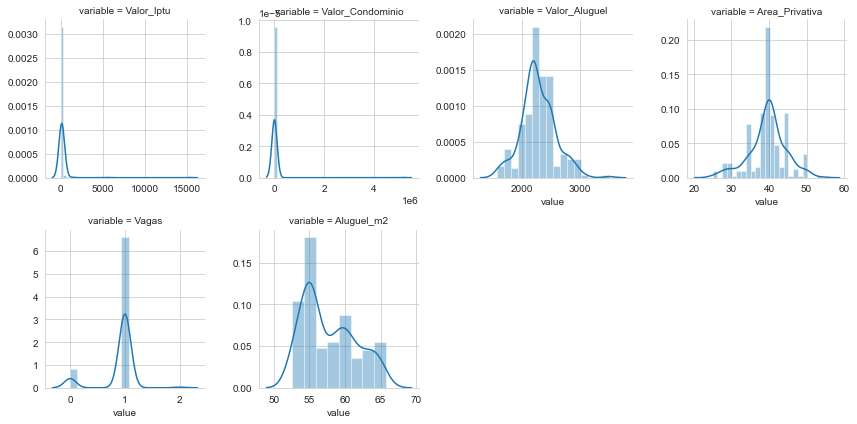

In [119]:
# Verificando a distribuição por histogramas das variáveis numéricas

def hist_col_num(df, col_num):
    '''
    Pega o dataframe, as colunas numéricas como lista
    Retorna um grupo de histogramas com  elas
    
    '''
    f = pd.melt(df, value_vars=col_num) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g

plt.figure(figsize=(20,10))
hist_col_num(df_pdz, df_pdz[['Valor_Iptu', 'Valor_Condominio', 'Valor_Aluguel', 'Area_Privativa', 'Vagas', 'Aluguel_m2']])

In [110]:
# Agrupamento das métricas correspondentes a cada metragem quadrada do imóvel e o aluguel/m²

datapdz = df_pdz.groupby(['Area_Privativa']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
datapdz.replace(np.nan, 0, inplace=True)
display(datapdz)

,min,max,mean,std,size
Area_Privativa,,,,,
25,64.00,64.00,64.000000,0.000000,1
26,61.54,65.38,63.460000,2.715290,2
28,58.93,64.29,61.954286,2.053208,7
30,52.67,63.33,58.457143,4.351983,7
31,64.52,64.52,64.520000,0.000000,1
32,53.12,65.62,59.373333,6.250003,3
33,54.06,59.06,57.393333,2.886751,3
34,58.82,64.71,63.868571,2.226211,7
35,52.86,65.71,60.567222,2.729039,18


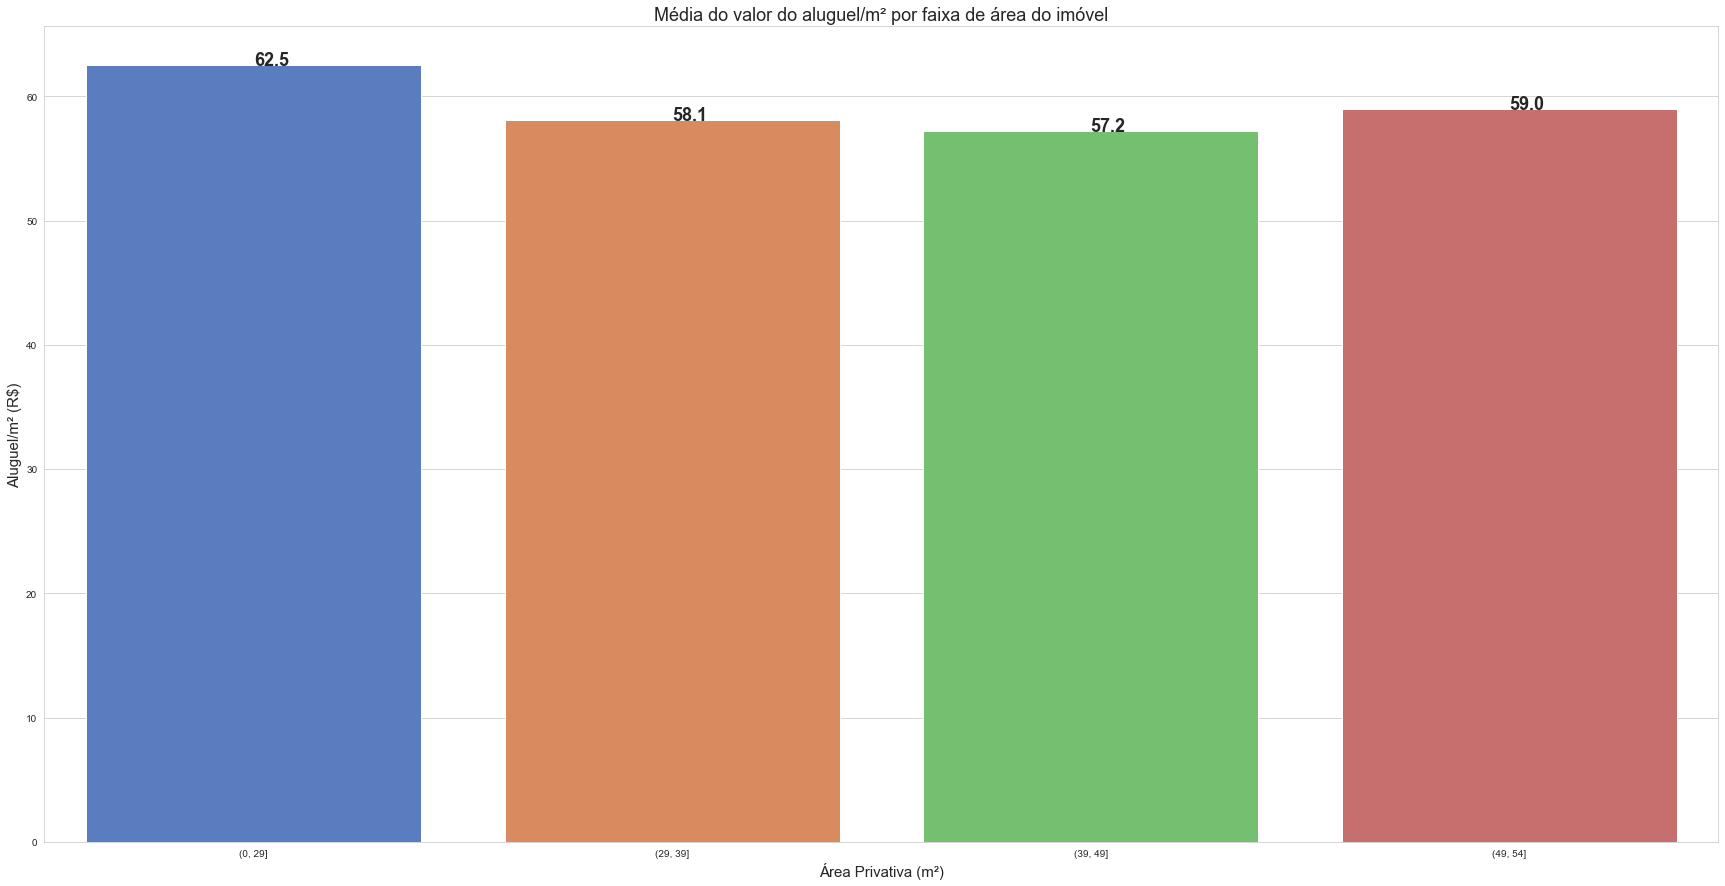

In [120]:
# Agrupando as médias de aluguel/m² em faixas de área privativa

dfbx = df_pdz.groupby(pd.cut(df_pdz['Area_Privativa'], [0, 29, 39, 49, 54])).agg(media =('Aluguel_m2', lambda p: p.mean())).round(1)

# Verificando a média de aluguel por m2 por faixas de área privativa

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,15))
ax = sns.barplot(x=dfbx.index, y='media', data=dfbx, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel/m² por faixa de área do imóvel", fontsize=18)
ax.set_xlabel("Área Privativa (m²)", fontsize=15)
ax.set_ylabel("Aluguel/m² (R$)", fontsize=15)

# calculando médias e plotando no barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), fontsize = 18, weight='bold' )

In [111]:
# Agrupamento das métricas correspondentes a cada metragem quadrada do imóvel e o aluguel total

datapdz_ = df_pdz.groupby(['Area_Privativa']).Valor_Aluguel.agg(['min', 'max', 'mean', 'std', 'size'])
datapdz_.replace(np.nan, 0, inplace=True)
display(datapdz_)

,min,max,mean,std,size
Area_Privativa,,,,,
25,1600,1600,1600.000000,0.000000,1
26,1600,1700,1650.000000,70.710678,2
28,1650,1800,1734.714286,57.436093,7
30,1580,1900,1753.714286,130.600809,7
31,2000,2000,2000.000000,0.000000,1
32,1700,2100,1900.000000,200.000000,3
33,1784,1949,1894.000000,95.262794,3
34,2000,2200,2171.428571,75.592895,7
35,1850,2300,2119.833333,95.524096,18


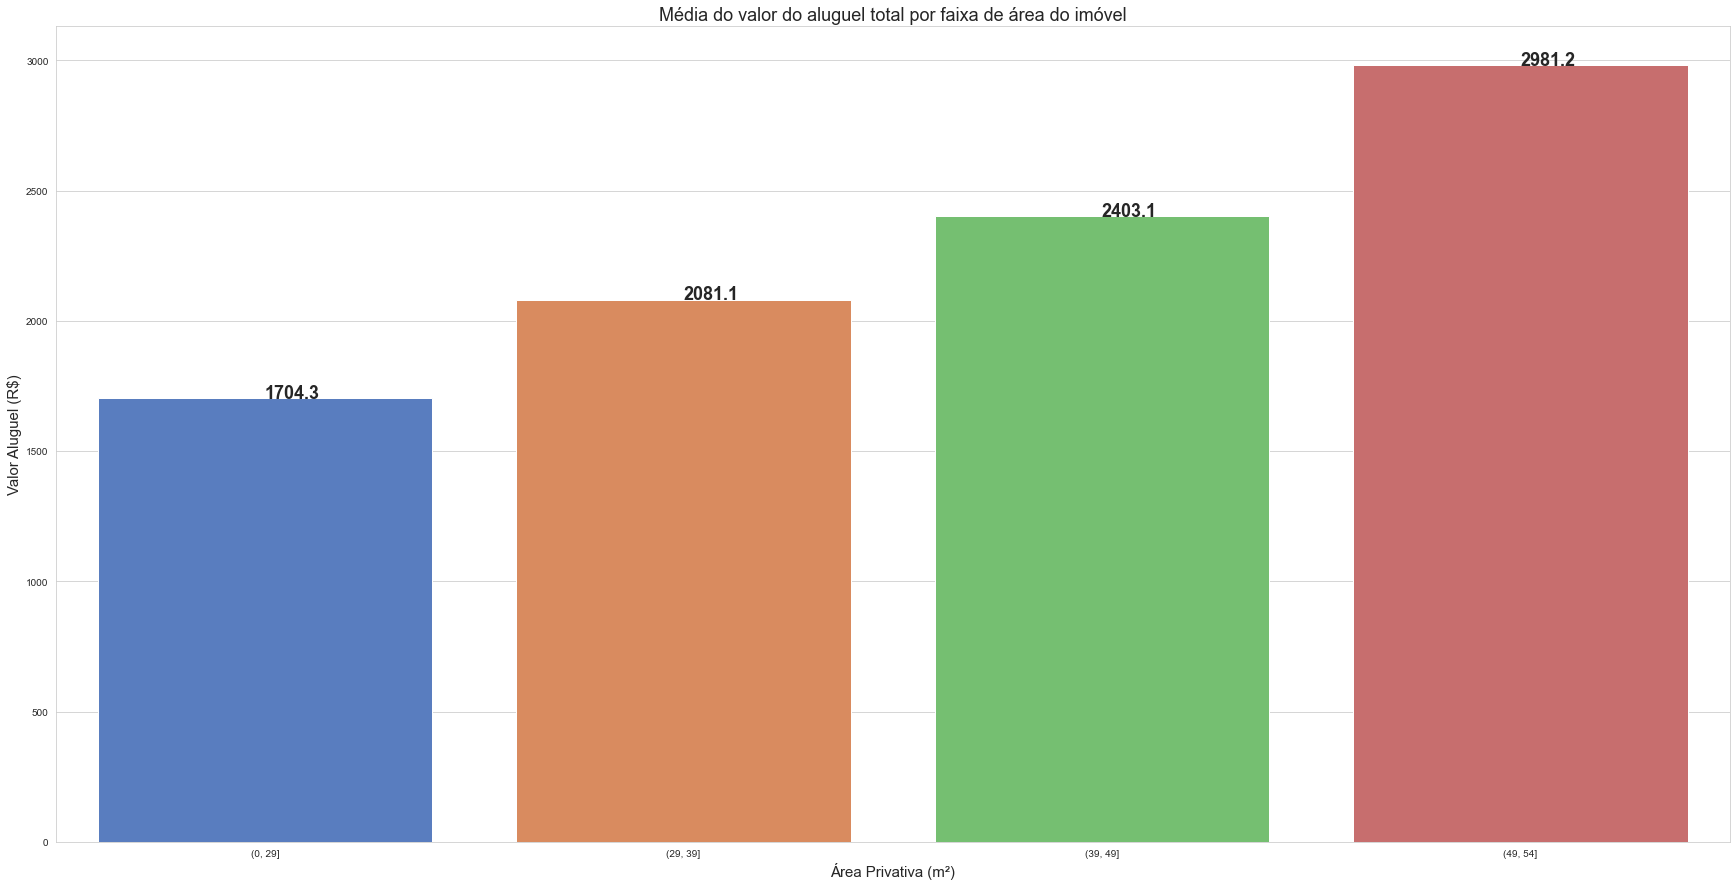

In [121]:
# Agrupando as médias de aluguel em faixas de área privativa

dfbx_ = df_pdz.groupby(pd.cut(df_pdz['Area_Privativa'], [0, 29, 39, 49, 54])).agg(media =('Valor_Aluguel', lambda p: p.mean())).round(1)

# Verificando a média de aluguel por faixas de área privativa

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,15))
ax = sns.barplot(x=dfbx_.index, y='media', data=dfbx_, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel total por faixa de área do imóvel", fontsize=18)
ax.set_xlabel("Área Privativa (m²)", fontsize=15)
ax.set_ylabel("Valor Aluguel (R$)", fontsize=15)

# calculando médias e plotando no barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), fontsize = 18, weight='bold' )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '25'),
  Text(1, 0, '26'),
  Text(2, 0, '28'),
  Text(3, 0, '30'),
  Text(4, 0, '31'),
  Text(5, 0, '32'),
  Text(6, 0, '33'),
  Text(7, 0, '34'),
  Text(8, 0, '35'),
  Text(9, 0, '36'),
  Text(10, 0, '37'),
  Text(11, 0, '38'),
  Text(12, 0, '39'),
  Text(13, 0, '40'),
  Text(14, 0, '41'),
  Text(15, 0, '42'),
  Text(16, 0, '43'),
  Text(17, 0, '44'),
  Text(18, 0, '45'),
  Text(19, 0, '46'),
  Text(20, 0, '47'),
  Text(21, 0, '48'),
  Text(22, 0, '49'),
  Text(23, 0, '50'),
  Text(24, 0, '54')])

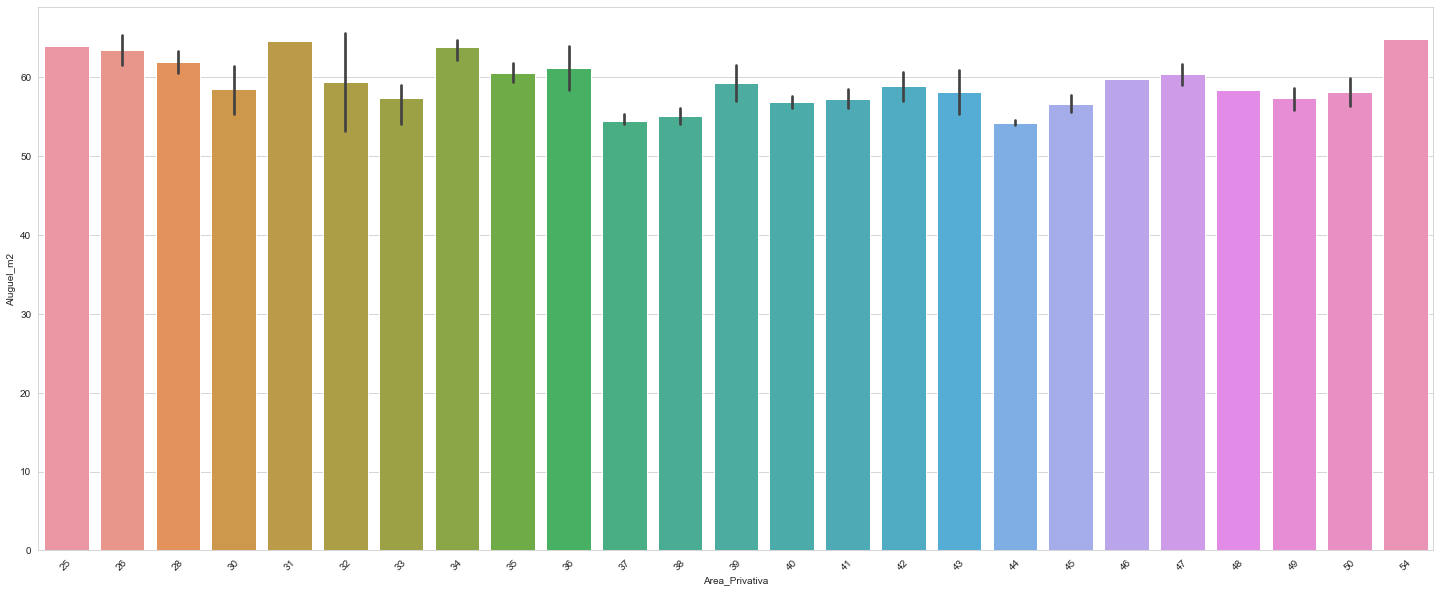

In [114]:
plt.figure(figsize=(25,10))
sns.barplot(x = df_pdz['Area_Privativa'], y = df_pdz['Aluguel_m2'])
plt.xticks(rotation=45)

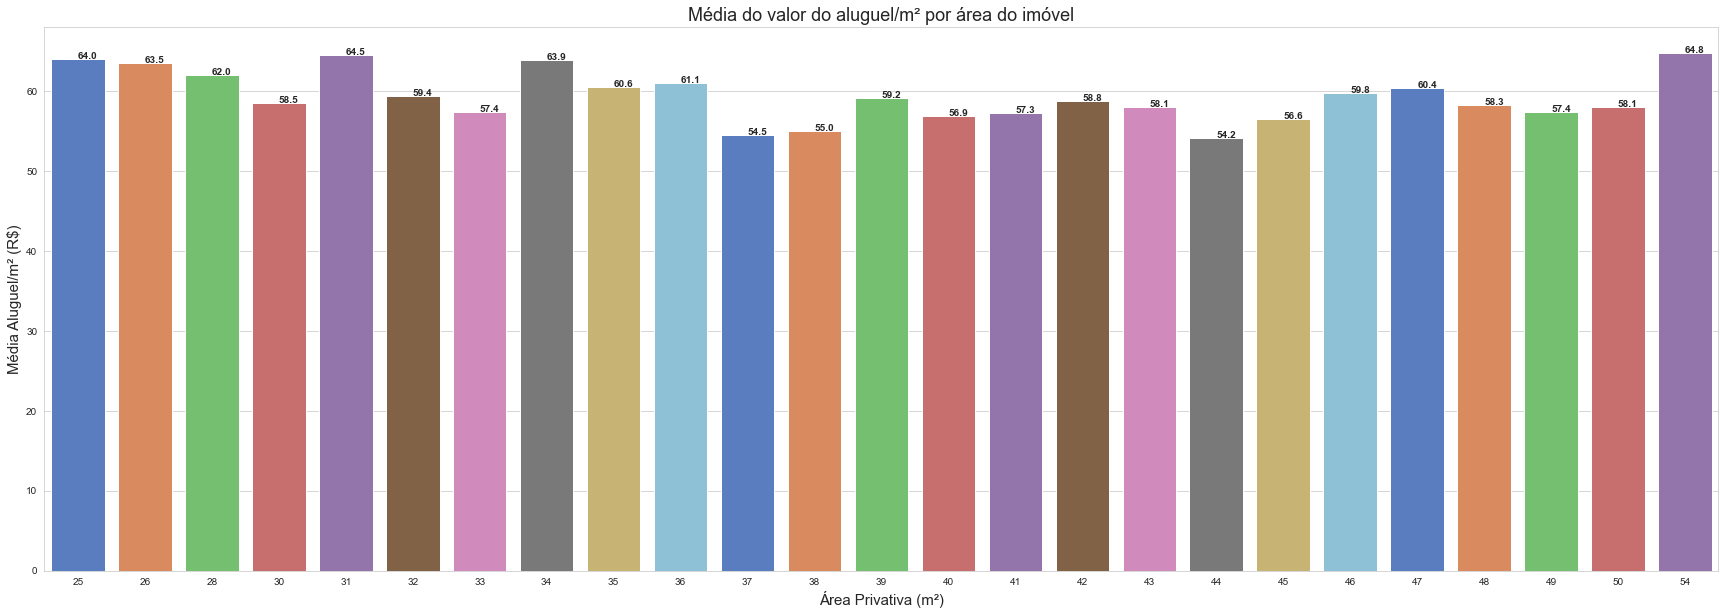

In [115]:
data_pdz = df_pdz.groupby('Area_Privativa').agg(media =('Aluguel_m2', lambda p: p.mean())).round(1)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,10))
ax = sns.barplot(x=data_pdz.index, y='media', data=data_pdz, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel/m² por área do imóvel", fontsize=18)
ax.set_xlabel ("Área Privativa (m²)", fontsize=15)
ax.set_ylabel ("Média Aluguel/m² (R$)", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )

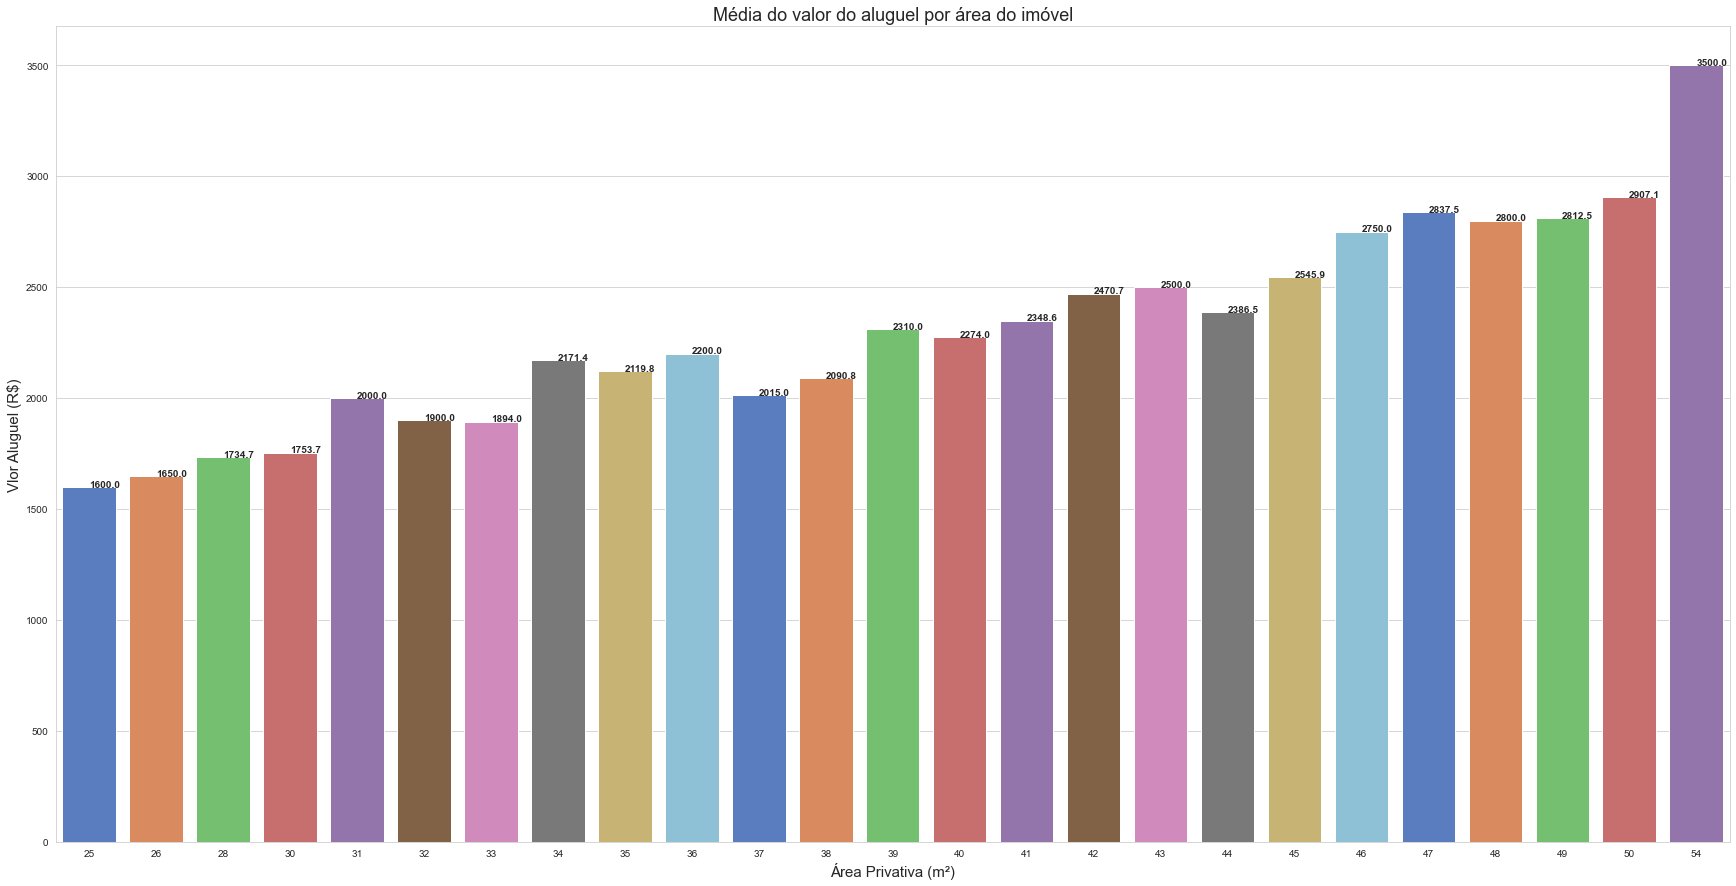

In [116]:
data_pdz_ = df_pdz.groupby('Area_Privativa').agg(media =('Valor_Aluguel', lambda p: p.mean())).round(1)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,15))
ax = sns.barplot(x=data_pdz_.index, y='media', data=data_pdz_, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel por área do imóvel", fontsize=18)
ax.set_xlabel ("Área Privativa (m²)", fontsize=15)
ax.set_ylabel ("Vlor Aluguel (R$)", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )